# Проверка гипотез по увеличению выручки в интернет-магазине <a id='intro'></a>
**Задача проекта:**

Провести приоретизацию гипотез по фреймворку ICE и RICE. По результатам А/В тестирования принять решение об остановке или продолжении теста и понять, успешен ли был тест на основе изменения среднего количества заказов на посетителя и среднего чека заказа. 

**Описание данных:**

1) Данные для первой части

Таблица hypothesis:  
Hypothesis — краткое описание гипотезы  
Reach — охват пользователей по 10-балльной шкале  
Impact — влияние на пользователей по 10-балльной шкале  
Confidence — уверенность в гипотезе по 10-балльной шкале  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

2) Данные для второй части

Таблица orders:  
transactionId — идентификатор заказа  
visitorId — идентификатор пользователя, совершившего заказ  
date — дата, когда был совершён заказ  
revenue — выручка заказа  
group — группа A/B-теста, в которую попал заказ

Таблица visitors:  
date — дата  
group — группа A/B-теста  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**План проекта:**
1) Первая часть:

    1.1 Загрузка данных
    1.2 Изучение данных и предоработка таблицы hypothesis
    1.3 Примение фреймворк ICE для приоритизации гипотез
    1.4 Примение фреймворк RICE для приоритизации гипотез
    1.5 Сравнение результатов ICE и RICE + вывод

2) Вторая часть: 

    2.1 Загрузка данных
    2.2 Изучение данных и предоработка таблицы orders
    2.3 Изучение данных и предоработка таблицы visitors
    2.4 График кумулятивной выручки по группам 
    2.5 График кумулятивного среднего чека по группам
    2.6 График относительного изменения кумулятивного среднего чека группы B к группе A
    2.7 График кумулятивного среднего количества заказов на посетителя по группам
    2.8 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
    2.9 Точечный график количества заказов по пользователям
    2.10 95-й и 99-й перцентили количества заказов на пользователя
    2.11 Tочечный график стоимостей заказов
    2.12 95-й и 99-й перцентили стоимости заказов
    2.13 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
    2.14 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
    2.15 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
    2.16 Принятие решения по результатам теста

3) Общий вывод

### Первая часть:

#### Загрузка данных

In [67]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [68]:
hypothesis=pd.read_csv('/datasets/hypothesis.csv')
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [69]:
hypothesis=pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 130
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


#### Изучение данных и предоработка таблицы hypothesis

In [70]:
hypothesis.info()
number_hypothesis=hypothesis.shape[0]
print()
print(number_hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

9


In [71]:
hypothesis.columns = hypothesis.columns.str.lower()

In [72]:
pd.options.display.max_colwidth = 130
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Вывод:** в таблице всего 9 строк: нет пропусков, нет дубликатов, нет аномальных значений, выходяших за рамки 10-балльной шкалы. Названия столбцов таблицы были приведены к каноничсекому виду. 

#### Примение фреймворк ICE для приоритизации гипотез

In [73]:
hypothesis['ICE']=hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis['ICE']=round(hypothesis['ICE'],2)
pd.options.display.max_colwidth = 130
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:** в тройку лидеров по фреймворку ICE вошли 8, 0, 7 гипотезы. 

#### Примение фреймворк RICE для приоритизации гипотез

In [74]:
hypothesis['RICE']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis['RICE']=round(hypothesis['RICE'],2)
pd.options.display.max_colwidth = 130
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** согласно фреймворку RICE самой перспективной гипотезой оказалась 7, за ней идут 2, 0 и 6 гипотеза. 

#### Сравнение результатов ICE и RICE

**Вывод:** 7 гипотеза достаточно сильно вырвалась вперед по фреймворку RICE, так как только у этой гипотезы параметр Reach равен 10 и ни у какой гипотезы нет 9 по данному параметру. А у гипотезы 8 данный показатель равен 1, те данные изменение затронут наименьшее количество пользователей, так что тот факт, что данная гипотеза по фреймворку занимает лидирующую позиции, не является решающим. То есть в выборе именно самой приоритетной гипотезы я бы опиралась на рейтинг по RICE и в первую очередь занялась бы осуществлением 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

### Вторая часть: 

#### Загрузка данных

In [75]:
orders=pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [76]:
visitors=pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


#### Изучение данных и предоработка таблицы orders

In [77]:
orders.info()
number_orders=orders.shape[0]
print()
print(number_orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

1197


In [78]:
orders= orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
orders['date']=pd.to_datetime(orders['date'], format = '%Y-%m-%d')

In [79]:
print(orders['group'].unique())
print(orders['revenue'].sort_values().unique())
print(orders['date'].sort_values().unique())

['B' 'A']
[     50      60      70      75      76      90     100     110     112
     120     130     150     160     165     170     172     190     240
     250     265     270     282     290     295     299     300     310
     320     340     350     359     360     370     380     382     383
     390     400     410     420     426     436     440     450     460
     470     480     490     495     500     510     530     540     550
     570     580     590     599     600     604     610     620     632
     640     650     654     660     690     697     700     720     725
     730     740     750     760     770     778     780     785     790
     800     820     830     840     850     860     870     880     890
     900     910     920     950     971     980     985     987     990
     995    1000    1020    1038    1040    1044    1050    1060    1090
    1100    1120    1130    1139    1140    1149    1170    1180    1188
    1190    1200    1220    1250    1253 

In [80]:
orders.duplicated().sum()

0

In [81]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**Вывод:** в таблице 1197 строк: нет дубликатов, нет пропусков, совсем аномальных значений (например, отрицательная прибыль) нет. Название первых двух столбцов были приведены к каноническому виду. Столбец с датой был приведен к нужному формату. Данные представлены за каждый день августа 2019 года. 

#### Изучение данных и предоработка таблицы visitors

In [82]:
visitors.info()
number_visitors=visitors.shape[0]
print()
print(number_visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

62


In [83]:
visitors['date']=pd.to_datetime(visitors['date'], format = '%Y-%m-%d')
visitors.duplicated().sum()

0

In [84]:
print(visitors['date'].sort_values().unique())
print(visitors['visitors'].sort_values().unique())

['2019-08-01T00:00:00.000000000' '2019-08-02T00:00:00.000000000'
 '2019-08-03T00:00:00.000000000' '2019-08-04T00:00:00.000000000'
 '2019-08-05T00:00:00.000000000' '2019-08-06T00:00:00.000000000'
 '2019-08-07T00:00:00.000000000' '2019-08-08T00:00:00.000000000'
 '2019-08-09T00:00:00.000000000' '2019-08-10T00:00:00.000000000'
 '2019-08-11T00:00:00.000000000' '2019-08-12T00:00:00.000000000'
 '2019-08-13T00:00:00.000000000' '2019-08-14T00:00:00.000000000'
 '2019-08-15T00:00:00.000000000' '2019-08-16T00:00:00.000000000'
 '2019-08-17T00:00:00.000000000' '2019-08-18T00:00:00.000000000'
 '2019-08-19T00:00:00.000000000' '2019-08-20T00:00:00.000000000'
 '2019-08-21T00:00:00.000000000' '2019-08-22T00:00:00.000000000'
 '2019-08-23T00:00:00.000000000' '2019-08-24T00:00:00.000000000'
 '2019-08-25T00:00:00.000000000' '2019-08-26T00:00:00.000000000'
 '2019-08-27T00:00:00.000000000' '2019-08-28T00:00:00.000000000'
 '2019-08-29T00:00:00.000000000' '2019-08-30T00:00:00.000000000'
 '2019-08-31T00:00:00.000

In [85]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Вывод:** в таблице 62 строки: нет дубликатов, нет пропусков, совсем аномальных значений (например, отрицательная количество пользователей в указанную дату) нет. Столбец с датой был приведен к нужному формату. Данные представлены за каждый день августа 2019 года. 

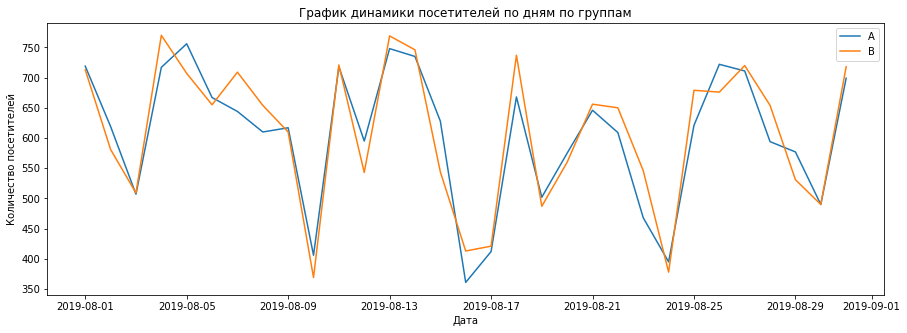

In [89]:
plt.figure(figsize=(15,5))
plt.plot(visitors[visitors['group'] == "A"].groupby('date')['visitors'].sum(),label='A')
plt.plot(visitors[visitors['group'] == "B"].groupby('date')['visitors'].sum(), label='B')
plt.title('График динамики посетителей по дням по группам')
plt.ylabel('Количество посетителей')
plt.xlabel('Дата')
plt.legend();

**Вывод:** в группе A - 503 уникального пользователя, в группе B - 586. Графики динамики посетителей по дням по группам в принципе очень схожи, заметен разве что локальный всплеск у группы В 7 августа, в то время как в группе А в этот день наблюдается падение. 

#### График кумулятивной выручки по группам 

In [90]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA=cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB=cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
print(cumulativeRevenueA.head())
print(cumulativeRevenueB.head())

        date  revenue  orders
0 2019-08-01   148579      24
2 2019-08-02   242401      44
4 2019-08-03   354874      68
6 2019-08-04   425699      84
8 2019-08-05   549917     109
        date  revenue  orders
1 2019-08-01   101217      21
3 2019-08-02   266748      45
5 2019-08-03   380996      61
7 2019-08-04   489567      78
9 2019-08-05   581995     101


In [91]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [93]:
print('Минимальная дата в orders:', orders['date'].min())
print('Минимальная дата в visitors', visitors['date'].min())
print('Минимальная дата в cumulativeData', cumulativeData['date'].min())
print()
print('Максимальная дата в orders:', orders['date'].max())
print('Максимальная дата в visitors', visitors['date'].max())
print('Максимальная дата в cumulativeData', cumulativeData['date'].max())

Минимальная дата в orders: 2019-08-01 00:00:00
Минимальная дата в visitors 2019-08-01 00:00:00
Минимальная дата в cumulativeData 2019-08-01 00:00:00

Максимальная дата в orders: 2019-08-31 00:00:00
Максимальная дата в visitors 2019-08-31 00:00:00
Максимальная дата в cumulativeData 2019-08-31 00:00:00


**Вывод:** минимальная и максимальная даты в датафрейме cumulativeData совпадает с минимальной и максимальной датой в исходных данных.

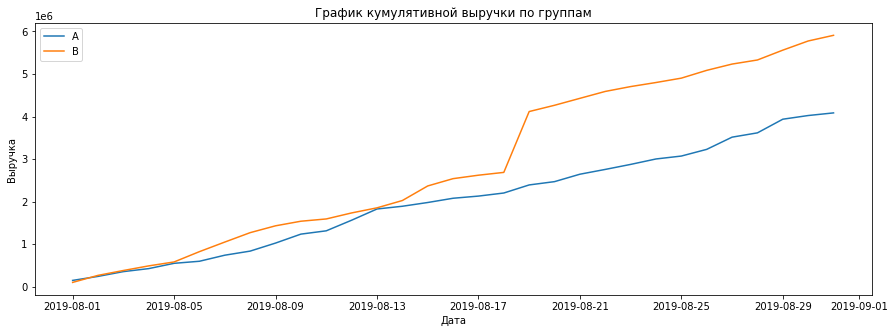

In [21]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.legend();

**Вывод:** выручка почти равномерно увеличивается в течение всего теста, что является хорошим знаком. У графика кумулятивной выручки в группе В наблюдается в одной точке скачок, что может говорить о наличии выброса, например, очень дорогого заказа или о всплеске количества заказов в этот день. Однако и без этого всплеска график для группы В находится выше графика А. 

#### График кумулятивного среднего чека по группам

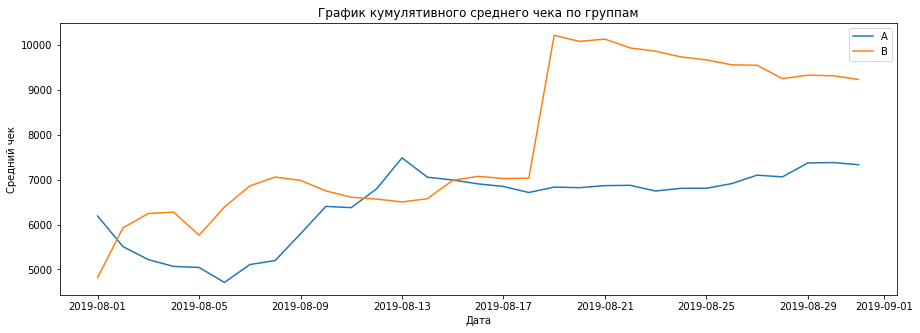

In [22]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend();

**Вывод:** графики среднего чека в обеих группах стабилизируются ближе к концу, у группы В опять наблюдается сильный скачок примерно в тот же день, что и на предыдущем графике, что подтверждает гипотезу об аномально дорогом заказе в этот день. 

#### График относительного изменения кумулятивного среднего чека группы B к группе A

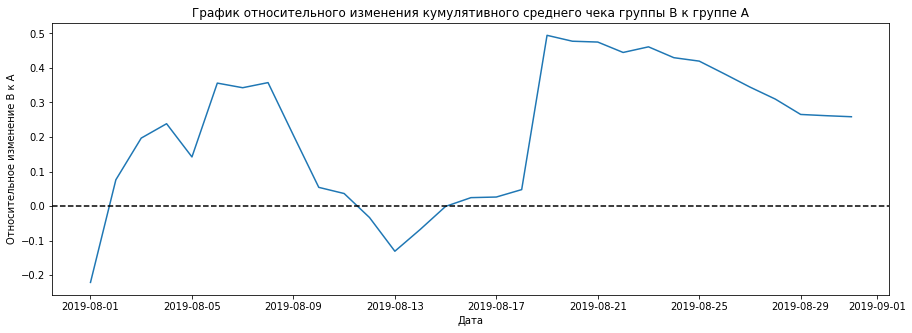

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Относительное изменение В к А')
plt.xlabel('Дата');


**Вывод:** очень во многих точках график относительного изменения среднего чека сильно скачет, что еще сильнее подтверждает наличие аномально больших значений (выбросов). Но большую часть времени показатель для группы В лучше группы А. 

#### График кумулятивного среднего количества заказов на посетителя по группам

In [24]:
cumulativeOrdersA=cumulativeData[cumulativeData['group']=='A'][['date','buyers', 'orders']]
cumulativeOrdersB=cumulativeData[cumulativeData['group']=='B'][['date','buyers', 'orders']]

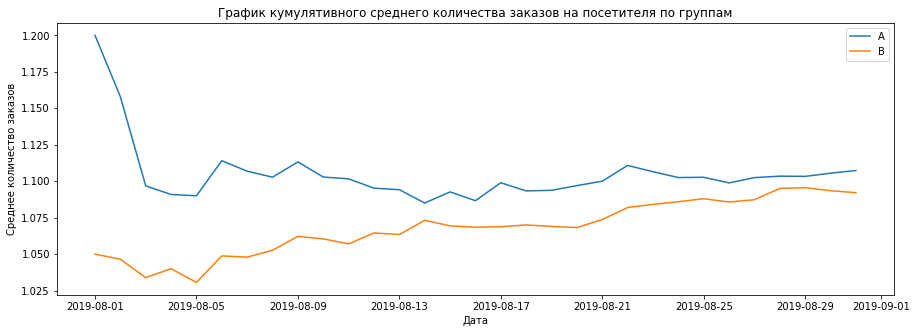

In [25]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['buyers'], label='A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['buyers'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Cреднее количество заказов')
plt.xlabel('Дата')
plt.legend();

**Вывод:** в начале графика кумулятивного среднего количества заказов на посетителя для группы В есть сильные скачки, а дальше ситуация стабилизируется, что может говорить о выбросах в начале теста.  Более того, на протяжении вего периода график группы В находится выше графика группы А. Можно отметить, что кумулятивное среднее количество заказов постоянно растет, а вот для группы В заметить какой-то рост уже сложнее, скорее наблюдаются колебания вокруг значения примерно 1,1. 

In [95]:
cumulativeOrdersA=cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]
cumulativeOrdersB=cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

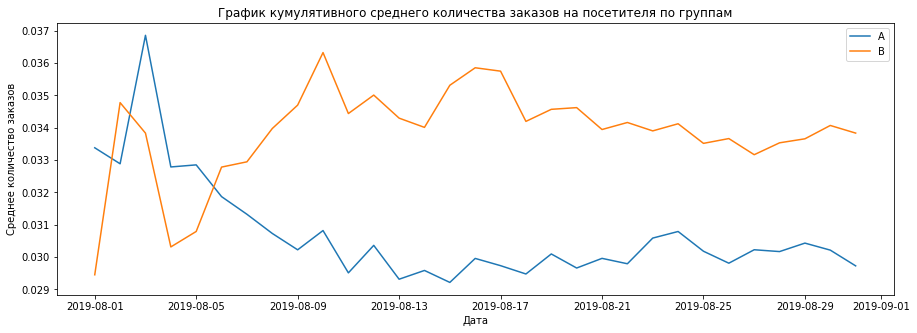

In [96]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['visitors'], label='A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['visitors'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Cреднее количество заказов')
plt.xlabel('Дата')
plt.legend();

**Вывод:** в начале графика кумулятивного среднего количества заказов на посетителя есть сильные скачки у обеих групп, а ближе к концу ситуация стабилизируется, что может говорить о выбросах в начале периода. Более того, вначале график группы А находится выше, а начиная с 7 августа график группы В поднимается выше графика группы А. Можно отметить, что кумулятивное среднее количество заказов выросло для группы В, а вот для группы А сильно упало. 

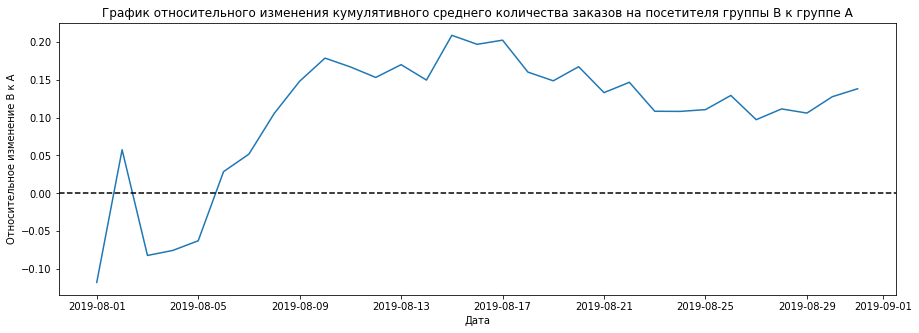

In [109]:
mergedCumulativeOrders = cumulativeOrdersA.merge(cumulativeOrdersB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB'])/(mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Относительное изменение В к А')
plt.xlabel('Дата');

**Новый вывод:** в начале месяца мы опять видим на графике скачки, что еще сильнее подтверждает гипотезу о наличии в это время каких-то выбросов. Однако, группа В стабильно лучше группы A по среднему количеству заказов на посетителя, хотя разница между ними постепенно уменьшается к концу периода. 

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

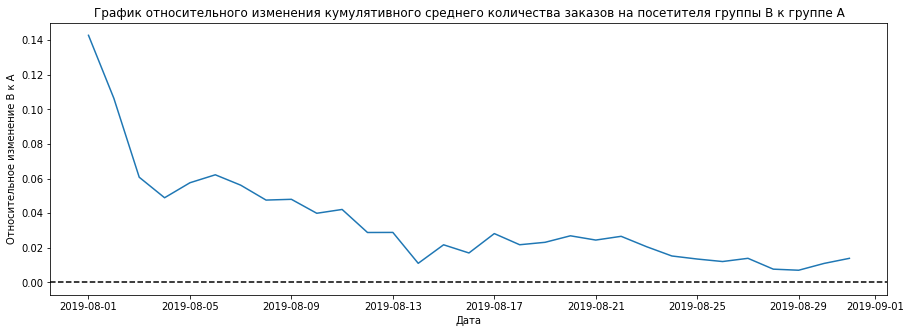

In [26]:
mergedCumulativeOrders = cumulativeOrdersA.merge(cumulativeOrdersB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['buyersA'])/(mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['buyersB'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Относительное изменение В к А')
plt.xlabel('Дата');

**Вывод:** в начале месяца мы опять видим на графике скачки, что еще сильнее подтверждает гипотезу о наличии в это время каких-то выбросов. Однако, группа В стабильно лучше группы А по среднему количеству заказов на посетителя, хотя разница между ними постепенно уменьшается к концу периода. 

#### Точечный график количества заказов по пользователям

In [27]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


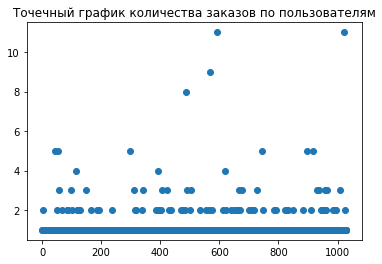

In [28]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям');

**Вывод:** по графику видно, что большинство пользователей делает 1-2 заказа, но надо проверить долю посетителей с 3-11 заказами, чтобы понять можно ли считать их аномалиями. 

#### 95-й и 99-й перцентили количества заказов на пользователя

In [29]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Вывод:** не более 5% пользователей оформляли больше чем 2 заказа и не более чем 1% - больше 4 заказов. Можно сделать вывод, что посетителей с 3-11 заказами можно считать аномалиями. 

#### Tочечный график стоимостей заказов

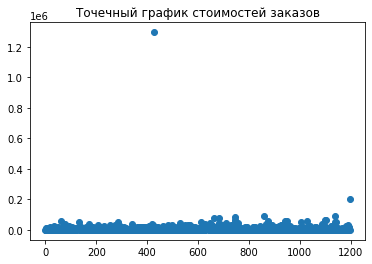

In [105]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов');

**Вывод:** на графике наблюдается 2 очень дорогих заказа, что смещает шкалу, и становится сложно определить, каких заказов по стоимости еще мало, так как все остальные заказы находятся в куче между 0 и 0,1. 

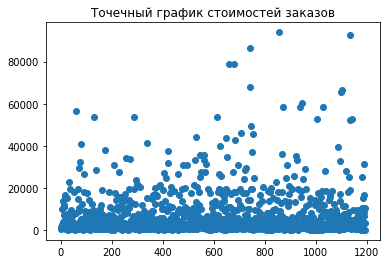

In [107]:
x_values = pd.Series(range(0,len(orders[orders['revenue'] < 200000]['revenue'])))
plt.scatter(x_values, orders[orders['revenue'] < 200000]['revenue'])
plt.title('Точечный график стоимостей заказов');

**Вывод:** если убрать два огромных заказа, то становится ясно, что большинство посетителей делает заказы на сумму от 0 до 20000. Но надо посмотреть на 95 и 99 перцентили, чтобы понять какую именно сумму можно считать аномальной. 

#### 95-й и 99-й перцентили стоимости заказов

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** не более 5% заказов дороже 28000 и не более чем 1% - дороже 58233.2. Можно сделать вывод, что заказы стоимостью выше 28000 можно считать аномалиями. 

#### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего числа заказов группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Относительный прирост среднего числа заказов группы B: 0.138


**Вывод:**  
Н0: различий в среднем количестве заказов между группами нет  
Н1: различия в среднем между группами есть  
p-value меньше 0,05, следовательно нулевая гипотеза о том, что различий в среднем количестве заказов на посетителя между группами нет, отвергается, то есть, различия есть. Другими словами, разницу в 13,8% между показателями разных групп можно считать статистически значимой на уровне значимости в 5%. 

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным 

In [34]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего числа заказов группы B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Относительный прирост среднего числа заказов группы B: 0.259


**Вывод:**  
Н0: различий в среднем чеке заказа между группами нет  
Н1: различия в среднем между группами есть  
p-value сильно больше 0,05, следовательно нулевая гипотеза о том, что различий в среднем чеке заказа между группами нет, принимается. Другими словами, разницу в 25,9% между показателями разных групп можно считать статистически незначимой на уровне значимости в 5%, следовательно можно сказать, что наблюдаемые различи ябыли получены случайно. 

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64
63


In [36]:
abnormalUsers.shape[0]/orders.shape[0]*100

5.263157894736842

**Комментарий:** я сначала попробовала сделать ограничение в 2 заказа на посетителя, но тогда аномалий было сильно больше 5%, так что я поставила границу в 3 заказа. 

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.018
Относительный прирост среднего числа заказов группы B: 0.148


**Вывод:**  
Н0: различий в среднем количестве заказов между группами нет  
Н1: различия в среднем между группами есть  
p-value меньше 0,05, следовательно нулевая гипотеза о том, что различий в среднем количестве заказов на посетителя между группами по "очищенным" данным нет, как и в случае "неочищенных" данных отвергается, то есть, различия есть. Другими словами, разницу в 14,8% между показателями разных групп можно считать статистически значимой на уровне значимости в 5%. По сравнению с "неочищенными" данными показатель вырос на 1 процентный пункт. Можно сделать вывод, что аномалии все-таки влияют, но не так критично. 

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [38]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего числа заказов группы B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


p-value: 0.977
Относительный прирост среднего числа заказов группы B: -0.017


**Вывод:**  
Н0: различий в среднем чеке заказа между группами нет  
Н1: различия в среднем между группами есть  
p-value сильно больше 0,05, следовательно нулевая гипотеза о том, что различий в среднем среднем чеке заказа между группами по "очищенным" данным нет, так же как и для "неочищенных" данных принимается на уровне значимости в 5%. Однако аномалии оказывается очень сильно влияли на средний чек между группами, так как без них оказалось, что показатель в группе В оказался на 1,7% меньше, чем в группе А, а по "неочищенным" данным в группе В покзатель был почти на 26% больше.

#### Принятие решения по результатам теста

По графикам кумулятивного среднего чека и среднего количества заказов на посетителя ситуации к концу месяца стабилизировались. Также по итогам анализа нет статистически значимого различия по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий, а вот средний чек заказа в двух группах статистически различны, только по сырым данным в группе В показатель выше на 26%, чем в группе А, а по очищенным - почти на 2% ниже. Я бы доверяла скорее очищенным данным, так как из точечного графика стоимости заказов видно, что были как минимум два заказа с огромной стоимостью, которые значительно сдвинули шкалу, из-за чего такое огромное различие в процентах становится логичным. Поэтому я бы остановила тест и признала победу группы В. 

### Общий вывод

1) Были взяты 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. На этапе предоработки были заменены названия столбцов на более канонические, в то время как никаких дубликатов, пропусков или аномалий не было обнаружено. С начала гипотезы были приоритизированны с помощью фреймворка ICE, а потом RICE. На основе данных рейтингов был сделан вывод, что в первую очередь стоит обратить внимание на гипотезу 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", так как данная гипотеза находится и в топ-3 по фреймворку ICE и занимает лидирующую позицию по RICE с большим отрывом от всех остальных, ведь она охватает наибольшее количество пользователей.  

2) Для второй части проекта были взяты результаты проведенного А/В теста. На этапе предоработки были заменены названия столбцов на более канонические, в то время как никаких дубликатов, пропусков или аномалий не было обнаружено. На основе построенного графика кумулятивной выручки по группам был сделан вывод, что выручка растет в представленный месяц в обеих группах, но график для группы В находится выше. Были также обнаружены скачки, которые могут говорить об аномально большом количестве заказов в определенный день или о наличии аномально дорого заказа.  

На графике кумулятивного среднего чека по группам опять заметки скачки и группа В лидирует на протяжении почти всего периода, что подтверждает и построенный график относительного изменения данного показателя группы В к группе А. Однако, согласно статистическому тесту что на «неочищенных» данных, что на данных без выбросов, относительное различие среднего чека между сегментами в ~26% в первом случае и ~ -2% во втором не являются значимыми при уровне значимости в 5%, а следовательно, данная разница была получена случайно.  

Согласно графику кумулятивного среднего количества заказов на посетителя по группам в начале периода заметны скачки, а дальше ситуация стабилизируется и показатель для группы В начинает занимать лидирующие позиции с большим отрывом, что подтверждает и график относительного изменения данного показателя группы В к группе А. Более того, согласно статистическому тесту и на «неочищенных», и на «очищенных» данных разницу между показателями разных групп в 13,8% в первом случае и в 14,8% во втором можно считать статистически значимой на уровне значимости в 5%.  

Для выявления аномалий в данных были рассмотрены 95-й и 99-й перцентили для количества заказов на пользователя и стоимости заказа. Были выбрали такие границы: точки с больше 3 заказов на посетителя или с суммой заказа свыше 28000 считались выбросами. Такие границы были выбраны из соображений, что аномальными значениями можно считать не более 5% всех данных.  
На основе проделанного анализа был сделан вывод о том, что стоит остановить тест и признать победу группы В по среднему количеству заказов на посетителя. 
